In [4]:
import mne
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt

In [21]:
_dfs_list = [
for csv_filename in tqdm(glob.glob('./drive/MyDrive/eeg1/*.csv')):
    _dfs_list.append(pd.read_csv(csv_filename))
df = pd.concat(_dfs_list)
del(_dfs_list)
df = df.drop(['Unnamed: 0'], axis=1)
#df = df.drop(['Unnamed: 0','X','Y','nd'], axis=1)

100%|██████████| 468/468 [00:11<00:00, 42.00it/s]


In [6]:
channel_list = list(set(df['sensor position']))
channel_list.sort()

channel_mapping = {
    'AFZ':'AFz', 
    'CPZ':'CPz', 
    'CZ':'Cz', 
    'FCZ':'FCz', 
    'FP1':'Fp1',
    'FP2':'Fp2', 
    'FPZ':'Fpz', 
    'FZ':'Fz', 
    'OZ':'Oz', 
    'POZ':'POz', 
    'PZ':'Pz',
}

channel_mapping_full = dict()

for ch in channel_list:
    if ch in channel_mapping:
        channel_mapping_full[ch] = channel_mapping[ch]
    else:
        channel_mapping_full[ch] = ch

channel_list_fixed = [channel_mapping_full[ch] for ch in channel_list]
        
df['sensor position'] = df['sensor position'].map(channel_mapping_full)

In [7]:
transposed_df_list = []

for group_df in tqdm(df.groupby(['name', 'trial number', 'matching condition', 'sensor position', 'subject identifier'])):
    _df = pd.DataFrame(group_df[1]['sensor value']).T
    _df.columns = [f'sample_{idx}' for idx in range(256)]
    _df['name'] = group_df[0][0]
    _df['trial number'] = group_df[0][1]
    _df['matching condition'] = group_df[0][2]
    _df['sensor position'] = group_df[0][3]
    _df['subject identifier'] = group_df[0][4]
    
    transposed_df_list.append(_df)
    
df = pd.concat(transposed_df_list)
df = df[[*df.columns[-5:],*df.columns[0:-5]]]
df = df.reset_index(drop=True)

100%|██████████| 29952/29952 [01:48<00:00, 276.78it/s]


In [8]:
def get_record_df(df, name, trial_number, matching_condition, channel_list):
    df_record = df[df['name'].eq(name) & df['trial number'].eq(trial_number) & df['matching condition'].eq(matching_condition)].set_index(['sensor position']).loc[channel_list]
    return df_record

Displaying raw signal as an image

In [10]:
def get_signal_array(df, name, trial_number, matching_condition, channel_list):
    df_record = get_record_df(df, name, trial_number, matching_condition, channel_list)
    return df_record.to_numpy()[:, 4:]

In [11]:
signal_array_a = get_signal_array(df,'co2a0000364', 10, 'S1 obj', channel_list_fixed)
signal_array_a.shape

(64, 256)

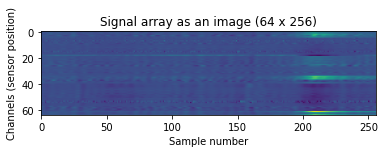

In [12]:
#Alcohole
plt.title('Signal array as an image (64 x 256)')
plt.ylabel('Channels (sensor position)');
plt.xlabel('Sample number');
plt.imshow(signal_array_a.astype(int));
plt.show()

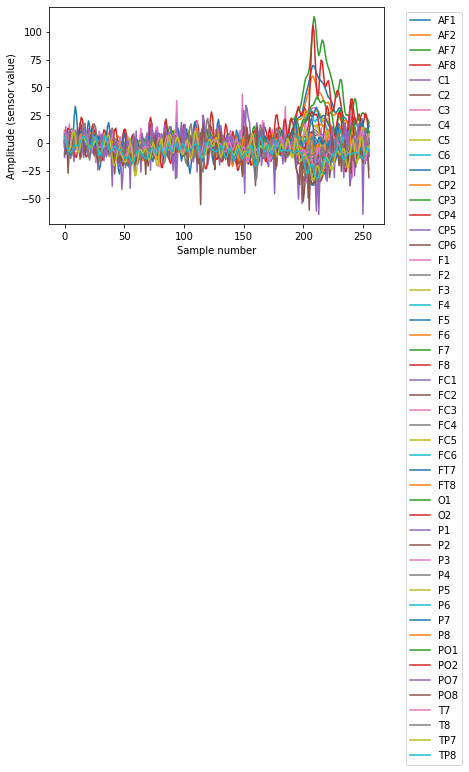

In [13]:
#Alcohole
channels_to_display = ['AF1', 'AF2', 'AF7', 'AF8', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'F1',
       'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3',
       'FC4', 'FC5', 'FC6', 'FT7', 'FT8',
       'O1', 'O2', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'T7', 'T8', 'TP7',
       'TP8']
for channel in channels_to_display:
    plt.ylabel('Amplitude (sensor value)');
    plt.xlabel('Sample number');
    plt.plot(signal_array_a[channel_list.index(channel)]);

plt.legend(channels_to_display, bbox_to_anchor=(1.05, 1.0));

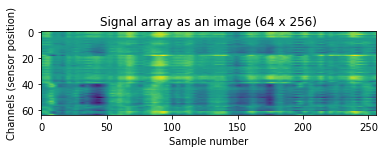

In [14]:
#  Control group
signal_array_c = get_signal_array(df, 'co2c0000345', 10, 'S1 obj', channel_list_fixed)
signal_array_c.shape

plt.title('Signal array as an image (64 x 256)')
plt.ylabel('Channels (sensor position)');
plt.xlabel('Sample number');
plt.imshow(signal_array_c.astype(int));
plt.show()

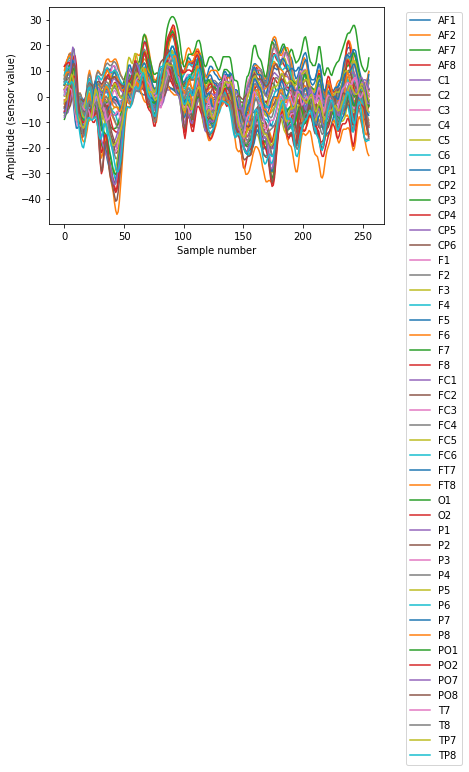

In [15]:
#  Control group
channels_to_display = ['AF1', 'AF2', 'AF7', 'AF8', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'F1',
       'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3',
       'FC4', 'FC5', 'FC6', 'FT7', 'FT8',
       'O1', 'O2', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'T7', 'T8', 'TP7',
       'TP8']
for channel in channels_to_display:
    plt.ylabel('Amplitude (sensor value)');
    plt.xlabel('Sample number');
    plt.plot(signal_array_c[channel_list.index(channel)]);

plt.legend(channels_to_display, bbox_to_anchor=(1.05, 1.0));

Effective window size : 1.000 (s)


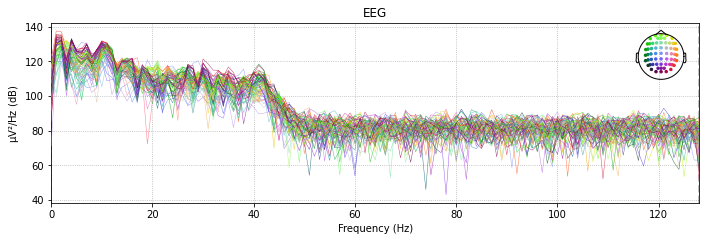

Effective window size : 1.000 (s)


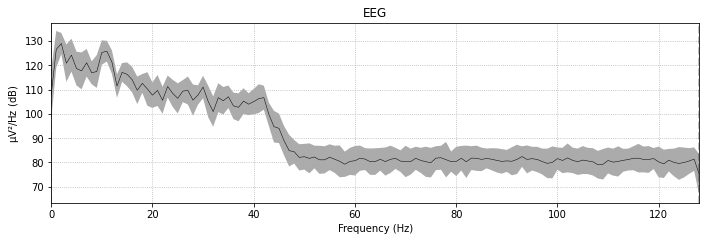

In [24]:
#Alcohol

raw_a.plot_psd();
raw_a.plot_psd(average=True);

Effective window size : 1.000 (s)


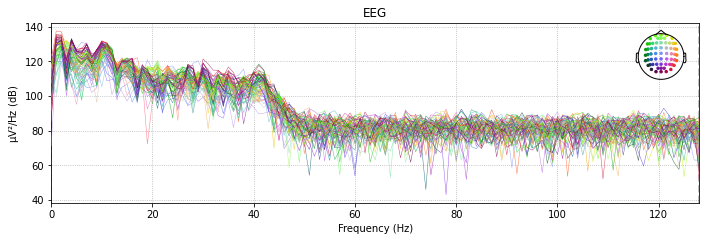

Effective window size : 1.000 (s)


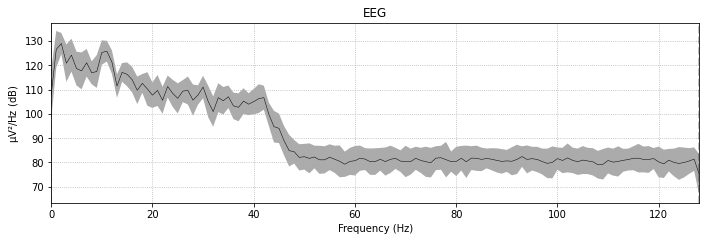

In [25]:
#Control

raw_c.plot_psd();
raw_c.plot_psd(average=True);